Data Leakage and other Pitfalls

imagine que desea entrenar un modelo para predecir los precios de la vivienda. 

- Junto con los datos históricos, como los pies cuadrados
- diseñas una función utilizando el promedio de los precios reales de las viviendas en todo el conjunto de datos. 
- Le complace ver qué tan bien funciona su modelo en los datos de prueba.
- Sin embargo, su modelo se enseñó utilizando datos que se filtraron del futuro y a los que no puede acceder en producción. 

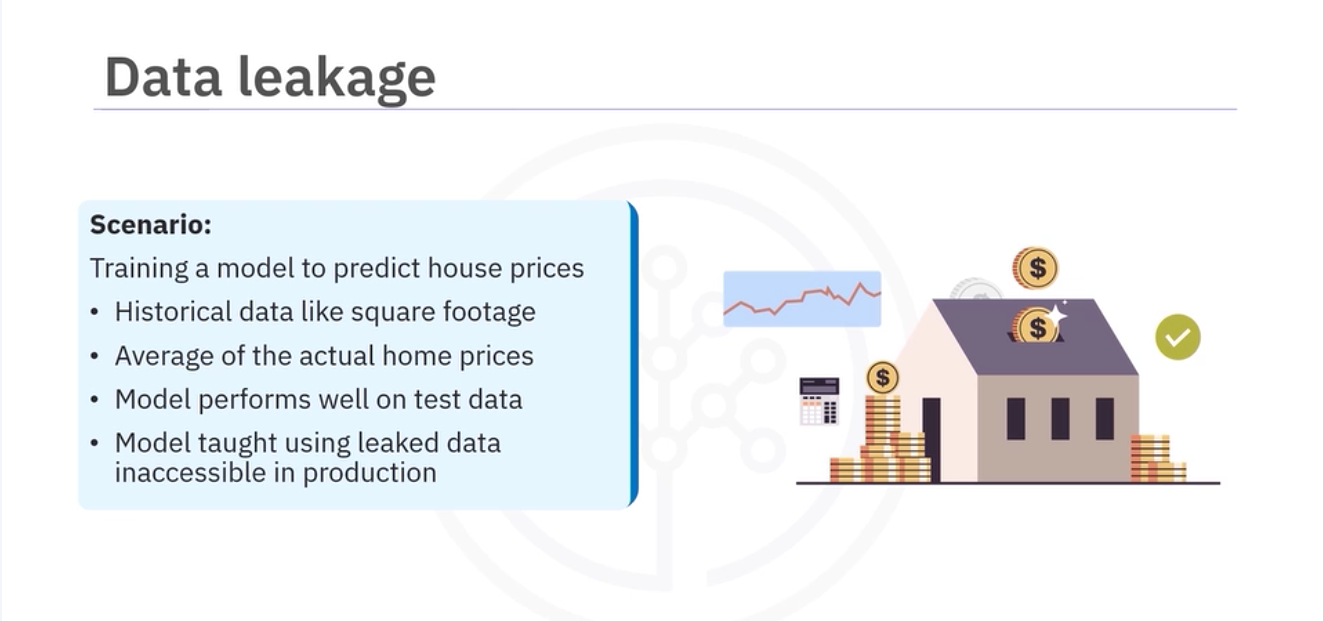

Data leakage

- Data leakage (La filtración de datos) se produce cuando los datos de entrenamiento de su modelo incluyen información que no estaría disponible en el mundo real, como datos invisibles después de la implementación.

- Data leakage engaña al modelo y hace que funcione de forma engañosa durante el entrenamiento y la validación.

- Dado que su conjunto de datos de prueba también contendrá estos datos filtrados, la evaluación no detectará la generalización deficiente hasta que implemente su modelo en producción.

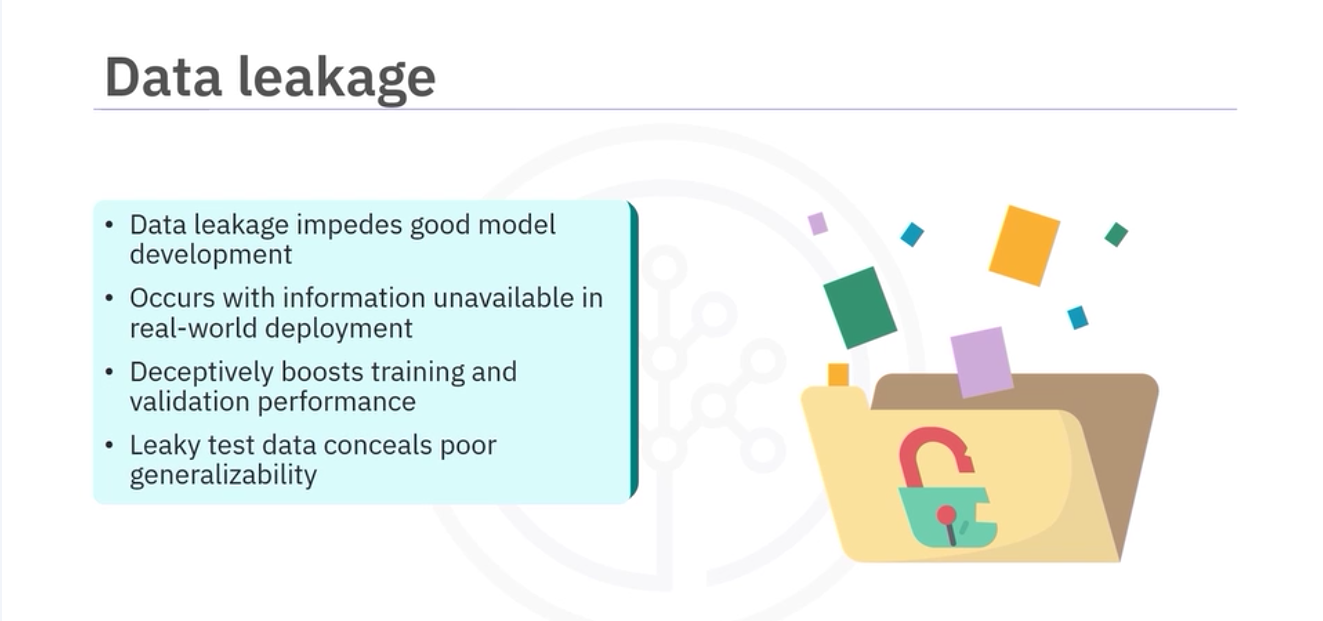

Data Snooping

- La intromisión de datos (data snooping) ocurre cuando el conjunto de entrenamiento contiene información sobre el conjunto de pruebas o cuando el modelo ve datos a los que no debería tener acceso.

- Esto puede ocurrir cuando se incluye información futura al predecir los resultados, como el precio de las acciones de mañana, para predecir el de hoy. 

- También puede tener lugar mientras se diseñan nuevas funciones utilizando todo el conjunto de datos. 

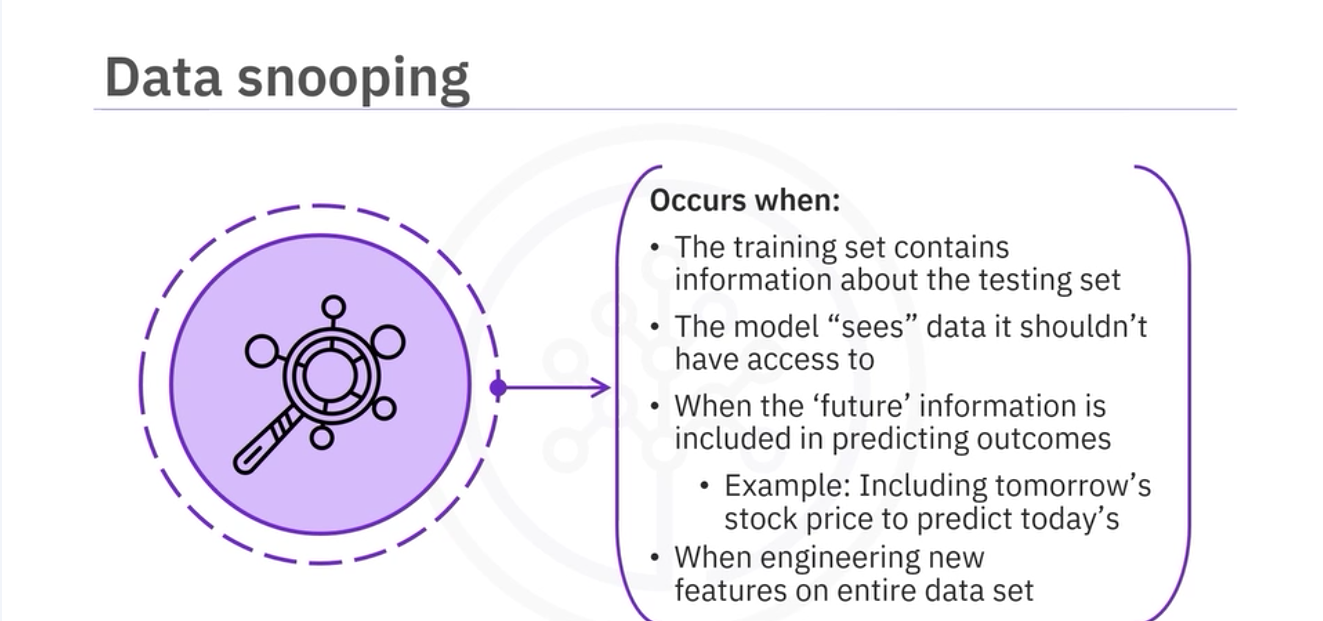

Mitigating data leakage

- Evite funciones como los promedios globales u otras estadísticas derivadas de todo el conjunto de datos. 

- Asegúrese de que haya una separación adecuada entre sus conjuntos de entrenamiento, validación y pruebas, evitando la superposición o la contaminación. 

- Asegúrese de que ninguna de sus funciones contenga información no disponible cuando haga predicciones reales con su modelo implementado. 

- Presta atención a la forma en que implementas la validación cruzada para asegurarte de que no se filtran datos entre distintos pliegues de validación. Esto es particularmente importante cuando se utilizan datos que dependen del tiempo. En este caso, debes usar una división de series temporales en lugar de la división habitual entre tren y prueba. 
- Para evitar fugas al utilizar la validación cruzada para ajustar los hiperparámetros del modelo, ajusta la canalización por separado a cada pliegue de entrenamiento y aplica la canalización ajustada resultante a su correspondiente pliegue de validació

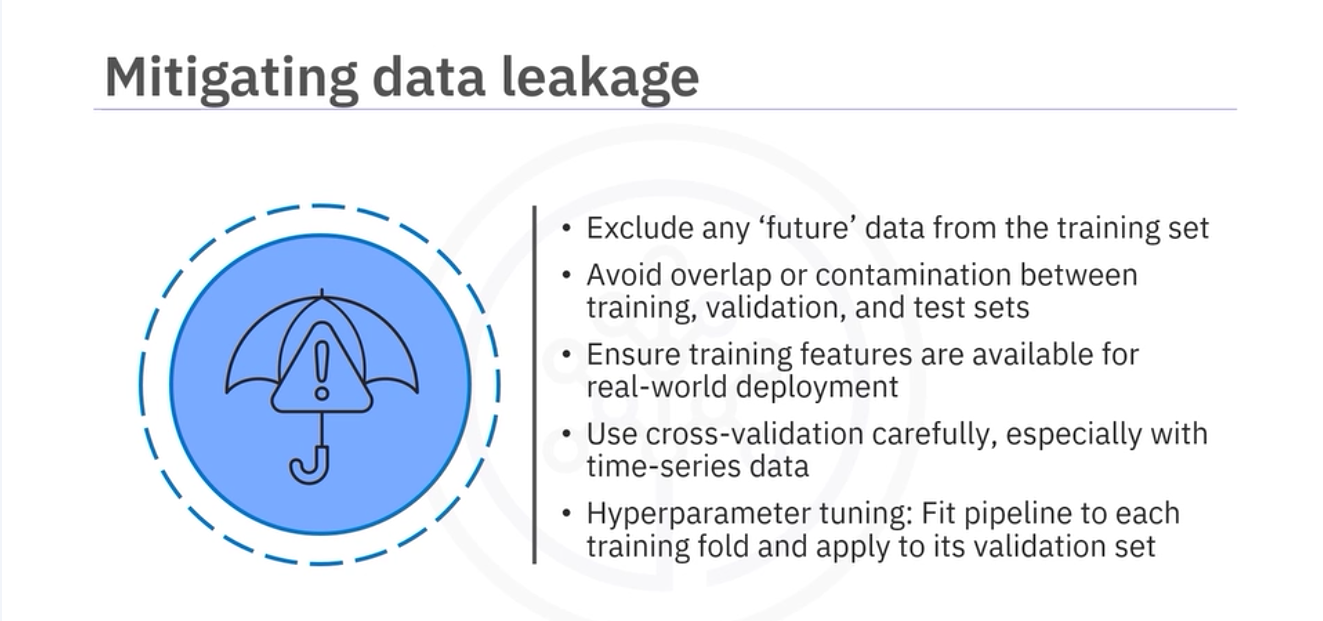

Handling cross-validation data leakage

Suponiendo que haya importado las bibliotecas necesarias, cargado los datos y tomado las precauciones necesarias para asegurarse de que ya no hay ninguna fuga de datos, considere este código de Python para entrenar un clasificador. 

- En primer lugar, divide los datos en conjuntos de datos de entrenamiento y prueba. Para este ejemplo, supongamos que se trata de un método válido para su conjunto de datos y que no se producirá ninguna contaminación por fugas temporales o de otro tipo. 

- Luego, defina una canalización de tres modelos: un clasificador escalar, PCA y KNN. 

- A continuación, se configura una cuadrícula de parámetros que consiste en un conjunto de valores para probar varios componentes de PCA y el número de vecinos en KNN.

- Ahora, optimice su modelo realizando una búsqueda en cuadrícula mediante la validación cruzada.

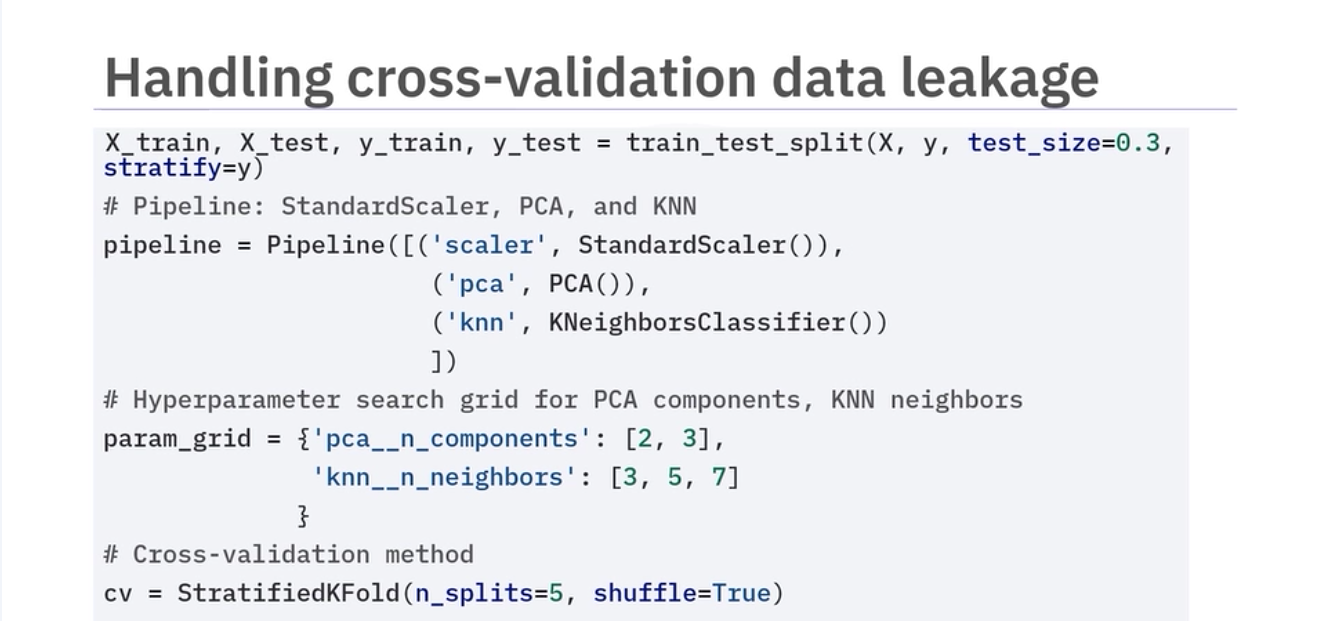

Es importante observar aquí que la canalización es una entrada para la búsqueda en la cuadrícula. Esto garantiza que la canalización se aplique por separado a cada pliegue de entrenamiento y a su conjunto de validación correspondiente.

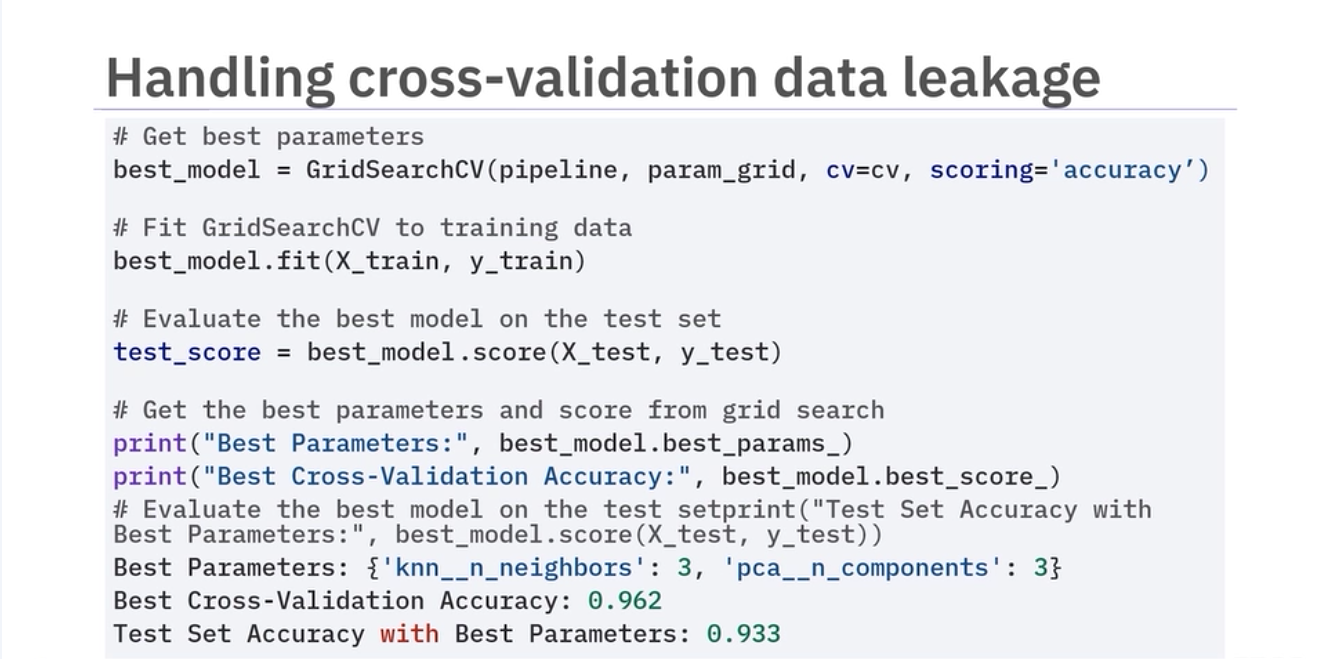

Después de encontrar los mejores parámetros, evalúas tu modelo final en el primer conjunto que retuviste para obtener una estimación imparcial del rendimiento de tu modelo en la naturaleza

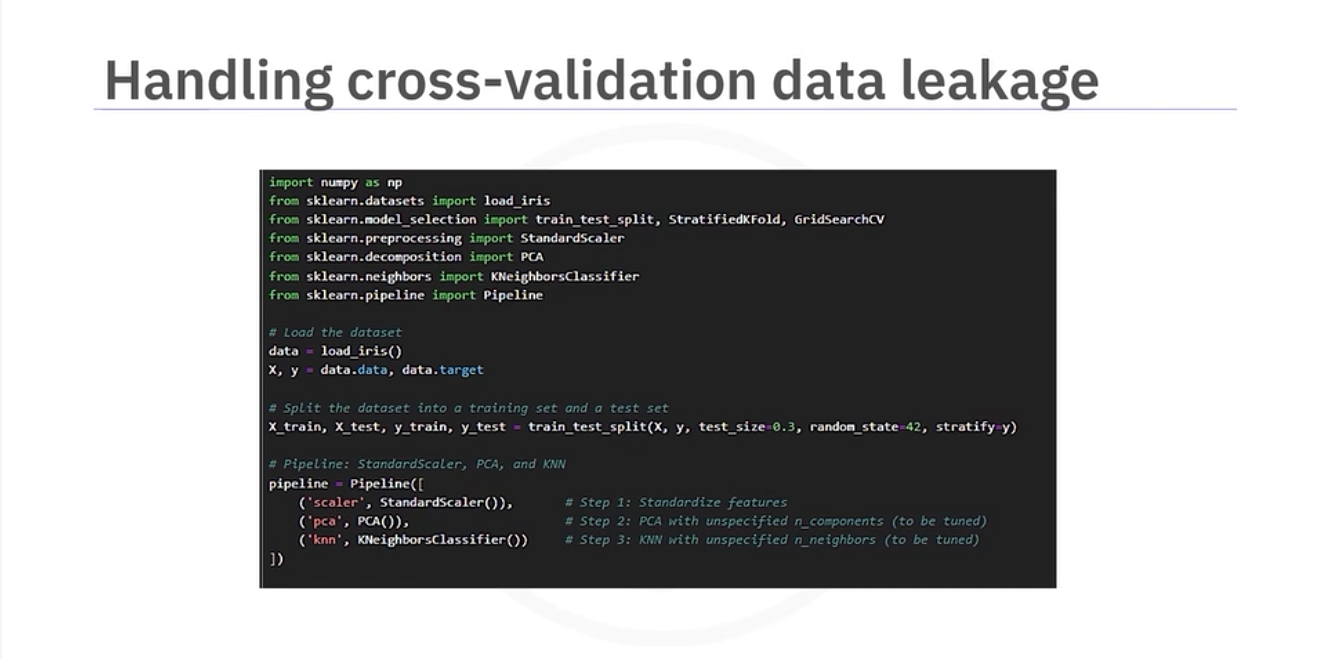

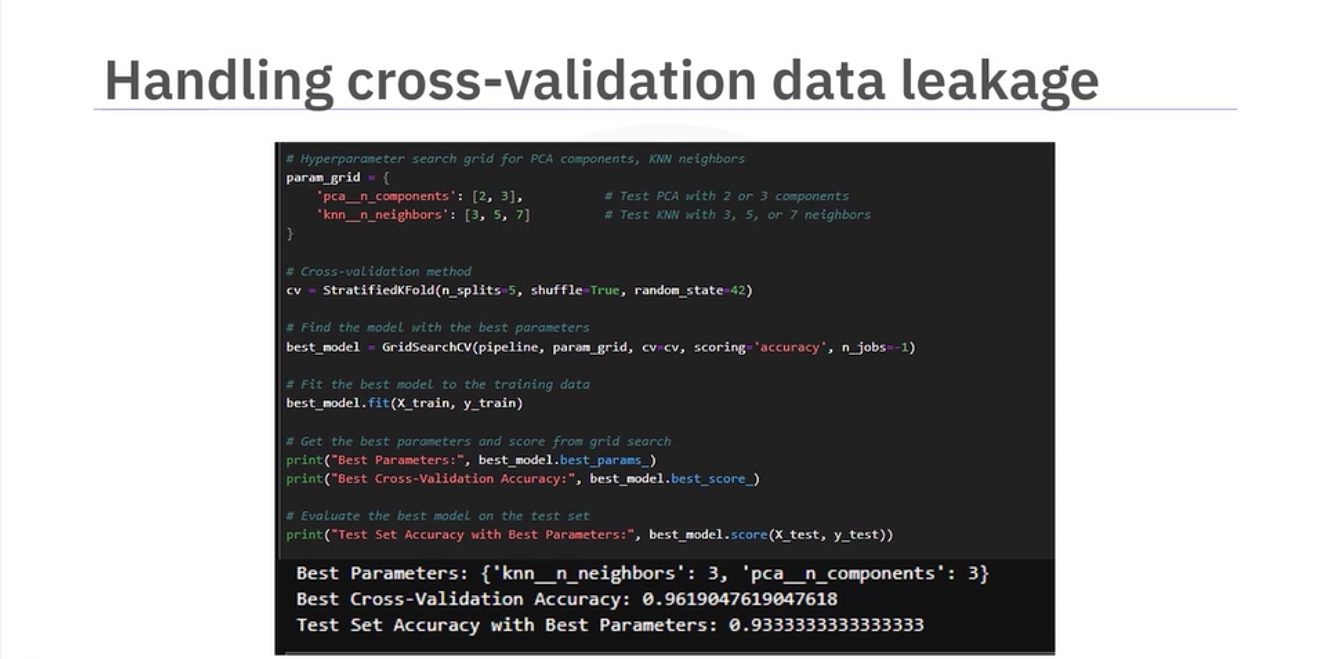

Code modification for time series data 

Si sus datos son temporales, donde el orden de los puntos de datos en el tiempo es crucial, debe evitar dividirlos aleatoriamente en conjuntos de entrenamiento y pruebas. 

En su lugar, debe dividir los datos en conjuntos secuenciales de entrenamiento y pruebas, asegurándose de que el conjunto de entrenamiento siempre preceda al conjunto de pruebas. 
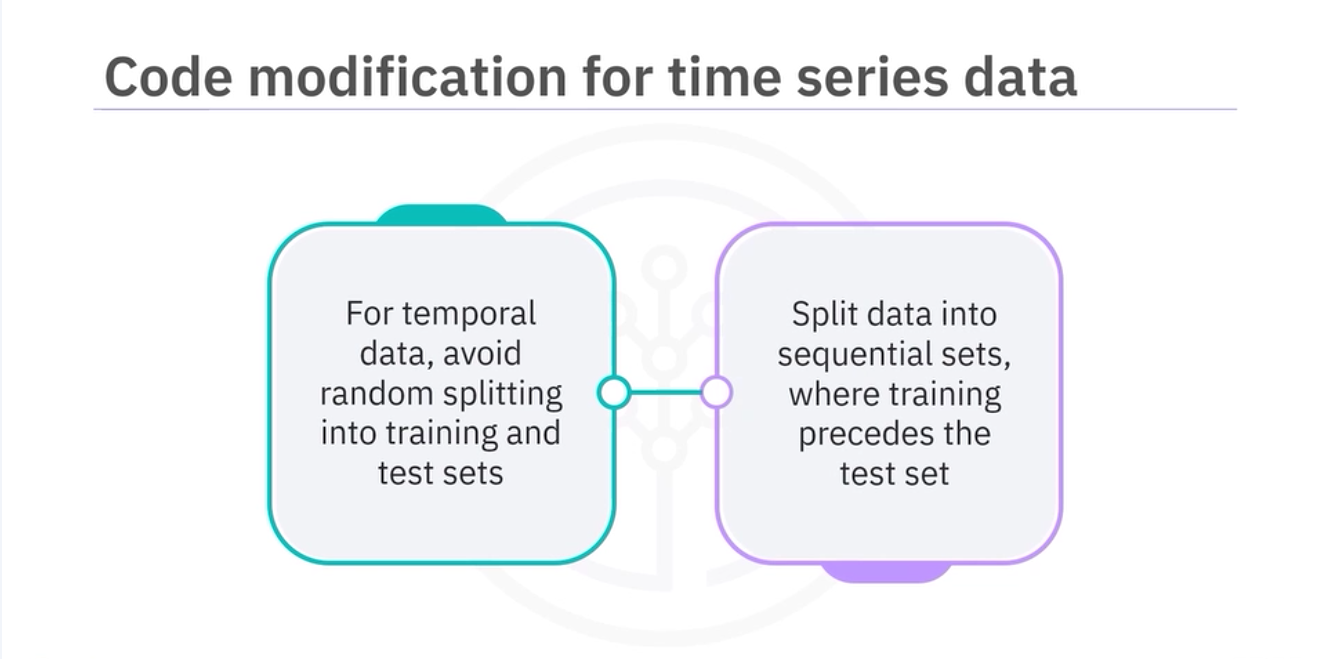


Modificar el código para implementar la validación cruzada de series temporales es fácil. En lugar de usar train-test-split, usaría time-series-split y especificaría que desea usar este método de validación cruzada durante el ajuste de hiperparámetros configurando CV igual a TSCV en grid-search-cv. 

En este ejemplo, la división de series temporales de Scikit-learn divide los datos en cuatro pliegues del mismo tamaño, conservando su orden temporal. Cada división usa una parte de los datos del pasado para el entrenamiento y los datos futuros restantes para la valida.

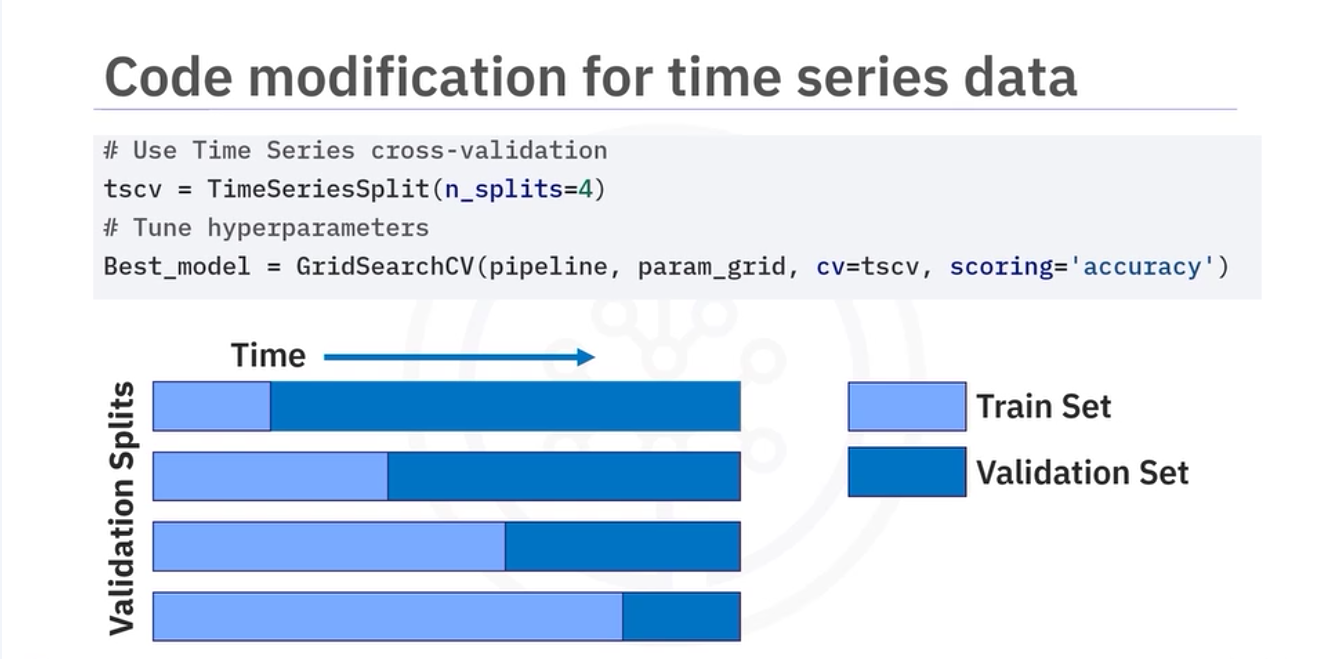

Feature importance intepretation pitfalls

Es esencial identificar algunos errores comunes y evaluar la importancia de las funciones que proporciona un modelo de aprendizaje automático entrenado. 

- Las características altamente correlacionadas o redundantes utilizadas en el modelado dan como resultado importancias compartidas, lo que reduce su influencia aparente. Además, seleccionar a ciegas cuáles parecen ser las características más importantes para utilizarlas en el modelado posterior puede provocar que se seleccione una característica importante para degradar los resultados. 

- Algunos algoritmos, como la regresión lineal, no tienen en cuenta de forma natural la escala de las características, por lo que los datos no cualificados pueden distorsionar las clasificaciones de importancia. 

- La importancia de las características indica correlación, no causalidad. Las características importantes no necesariamente impulsan los resultados.

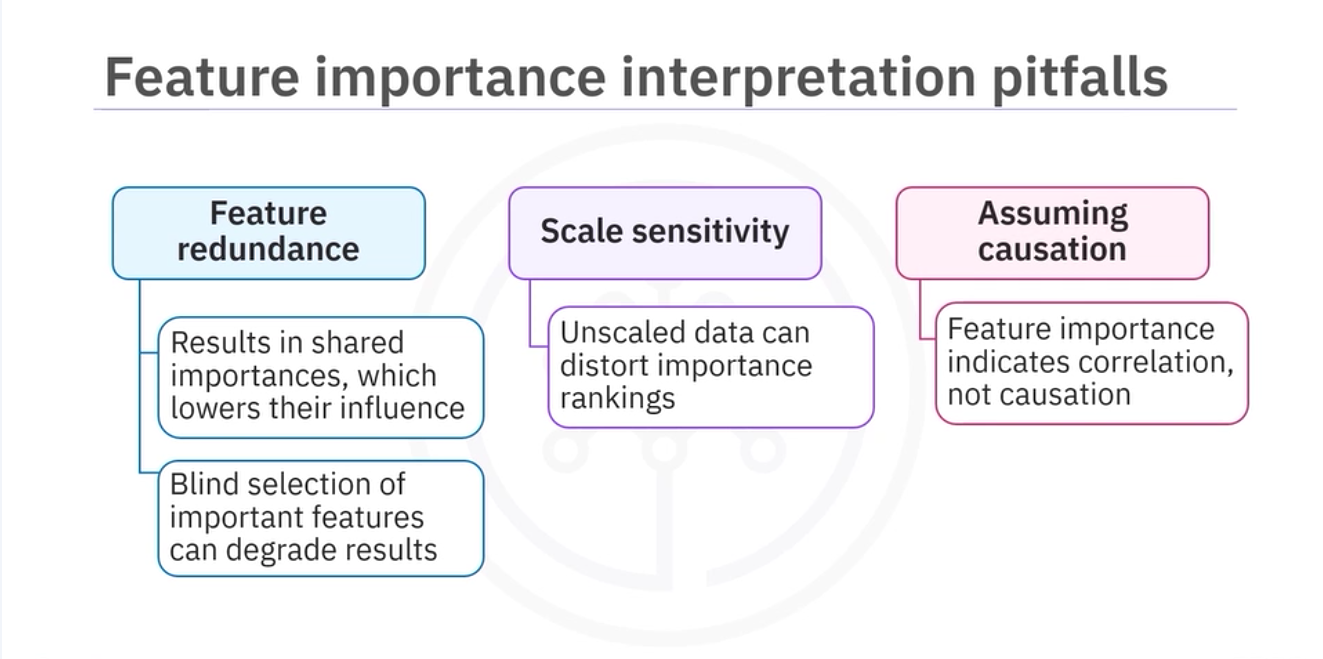

-Algunos modelos clasifican la importancia de las características individuales sin tener en cuenta las interacciones, lo que podría subestimar o sobreestimar su impacto combinado. 
 
- Por ejemplo, supongamos que tiene dos funciones que no proporcionan suficiente información para que la regresión lineal funcione correctamente. Sin embargo, su interacción o producto aumenta el rendimiento de la regresión lineal. 

- Entonces, un algoritmo no lineal como random forest aleatoria podría detectar implícitamente esta interacción, lo que generaría un buen rendimiento. En el caso de la regresión lineal, las características separadas parecerían erróneamente poco importantes. Al mismo tiempo, su importancia se compartiría para los random forest, y no tendrías ni idea de que su producto es la variable explicativa crucial

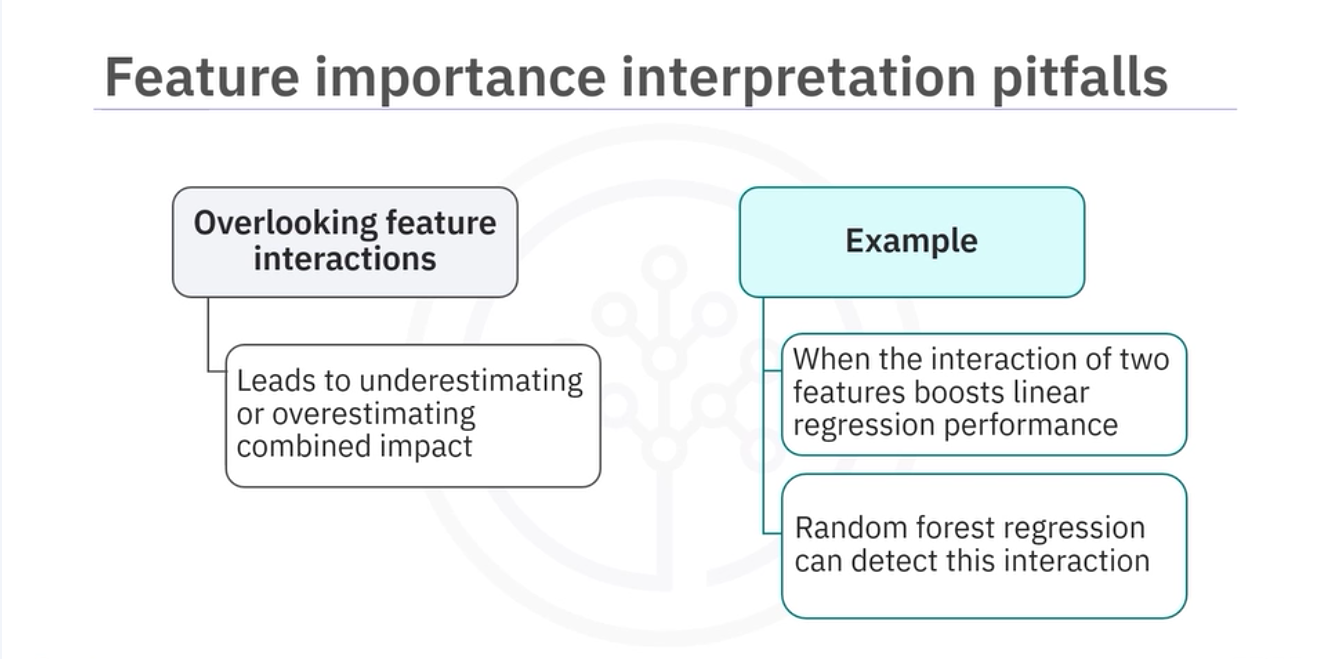

Other modeling pitfalls

Estos son algunos errores comunes de modelado a tener en cuenta:

- El uso de datos sin procesar sin una selección o transformación de características adecuada le impide descubrir su modelo óptimo.

- Elegir una métrica de evaluación incorrecta o malinterpretar las métricas puede inducir a error a la evaluación.
- Si no aborda los desequilibrios de clase y los problemas de clasificación, sus predicciones se inclinan hacia las clases mayoritarias. 
- Las herramientas de aprendizaje automático automatizadas pueden ser eficaces, pero aun así debes entender tus datos y el modelo que el sistema crea para ti.

- Es fundamental comprender que si su modelo carece de características que tengan un impacto causal en la variable objetivo, los escenarios hipotéticos generados por el modelo pueden no ser válidos. Sin relaciones causales, las predicciones del modelo basadas en cambios hipotéticos pueden ser muy engañosas o inexactas

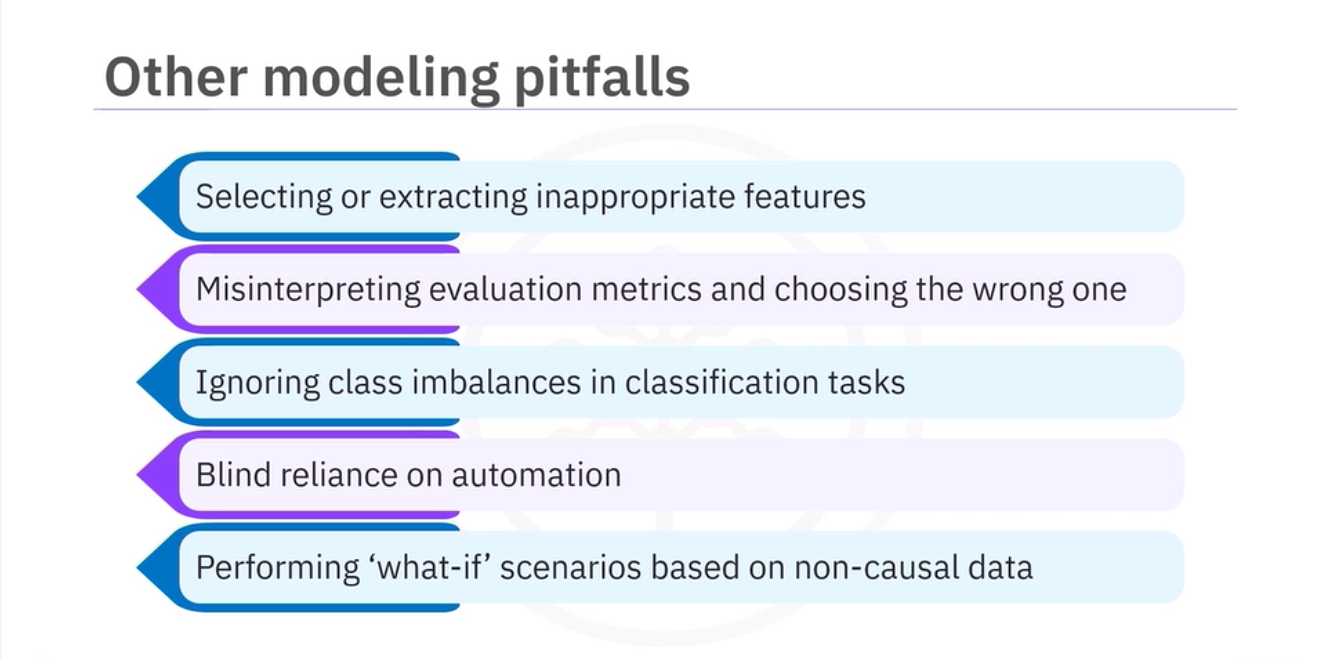

RECAP

- la filtración de datos se produce cuando los datos de entrenamiento de tu modelo incluyen información que no estaría disponible en el mundo real o datos invisibles después de la implementación.

- Puede mitigar la filtración de datos evitando la superposición o la contaminación entre los conjuntos de entrenamiento, validación y pruebas, garantizando que las funciones de capacitación estén disponibles para su implementación en el mundo real, utilizando cuidadosamente la validación cruzada y el ajuste de hiperparámetros. 

-Algunos errores comunes a la hora de evaluar la importancia de las funciones que proporciona un modelo de aprendizaje automático capacitado son la redundancia de las funciones, la sensibilidad a la escala, la suposición de causalidad y la omisión de las interacciones entre las funciones. 

- Otros escollos del modelado incluyen la selección de características inapropiadas, la mala interpretación de las métricas de evaluación, la ignorancia del desequilibrio de clases, la confianza ciega en la automatización y la realización de escenarios hipotéticos basados en datos no causales. 